In [1]:
# def initialize_params(layers_dims,m):
#     parameters={}
#     no_of_layers=len(layers_dims)
#     for i in range(1,no_of_layers):
#         parameters['W'+str(i)]=np.random.rand(layers_dims[i],layers_dims[i-1])/ np.sqrt(layers_dims[i-1])
#         parameters['b'+str(i)]=np.zeros((layers_dims[i],m))         
#     return parameters
# def softmax(a):
#     cache=a
#     softm=np.exp(a)
#     softm=softm/(np.sum(softm,keepdims=True))
#     return softm,cache
# def sigmoid(Z):
#     cache=Z
#     return 1.0/(1.0+np.exp(-Z)),cache
# def relu(Z):
#     cache=Z
#     return np.max(0,Z),cache
# def linear_forwrd(A_PREV,W,b):
# #     print('A_PREV',A_PREV.shape)
# #     print('W',W.shape)
# #     print('b',b.shape)
#     Z = np.add(np.matmul(W, A_PREV), b)
#     cache=(A_PREV,W,b)
# #     print('Z',Z.shape)
#     return Z,cache
# def linear_activation(A_PREV,W,b,activation):
#     if activation=="sigmoid":
#         Z,linear_cache=linear_forwrd(A_PREV,W,b)
# #         print('Z',Z.shape)
#         A,activation_cache=sigmoid(Z)
# #         print('A',A.shape)
#     elif activation=="relu":
#         Z,linear_cache=linear_forwrd(A_PREV,W,b)
#         A,activation_cache=relu(Z)
#     elif activation=="softmax":
#         Z,linear_cache=linear_forwrd(A_PREV,W,b)
#         A,activation_cache=softmax(Z)
#     cache=(linear_cache,activation_cache)
#     return A,cache       
# def forward_prop(images,parameters):
#     caches=[]
#     A=images
#     L=len(parameters)//2
#     for i in range(1,L+1):
#         if(i==L):
# #             print('called',i)
#             A_PREV=A   
# #             print('prev',(np.unique(A_PREV)))
#             A,cache=linear_activation(A_PREV,parameters['W'+str(i)],parameters['b'+str(i)],'sigmoid')
# #             print('new',np.unique(A))
#             caches.append(cache)
#         else:
# #             print(i)
#             A_PREV=A
# #             print('prev',np.unique(A_PREV))
#             A,cache=linear_activation(A_PREV,parameters['W'+str(i)],parameters['b'+str(i)],'sigmoid')
# #             print('new',np.unique(A))
#             caches.append(cache)
#     return A,caches



In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import h5py
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import os

In [3]:
file=h5py.File('MNIST_Subset.h5','r')
images=file['X'][:]
labels=file['Y'][:]
images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.3, random_state=42)
print('test-image-shape',images_test.shape,',train-image-shape',images_train.shape,'test-label-shape',labels_test.shape,',train-label-shape',labels_train.shape)

test-image-shape (4276, 28, 28) ,train-image-shape (9975, 28, 28) test-label-shape (4276,) ,train-label-shape (9975,)


In [4]:
label_train=np.where(labels_train==7,0,1)
label_test=np.where(labels_test==7,0,1)
label_train=label_train.reshape(1,9975)
label_test=label_test.reshape(1,4276)
print(label_test.shape)
print(label_train.shape)
image_test=np.reshape(images_test,(784,4276))
image_train=np.reshape(images_train,(784,9975))
print(image_test.shape)
print(image_train.shape)

(1, 4276)
(1, 9975)
(784, 4276)
(784, 9975)


In [5]:
image_train=image_train/255
image_test=image_test/255

In [6]:
def initialize_parameters_deep(layer_dims):
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))        
    return parameters
def linear_forward(A_prev, W, b):
    Z = np.add(np.matmul(W, A_prev), b)    
    assert(Z.shape == (W.shape[0], A_prev.shape[1]))
    cache = (A_prev, W, b)    
    return Z, cache
def sigmoid(Z):
    A = 1.0/(1.0+np.exp(-Z))
#     print(A)
    cache = Z    
    return A, cache
# def softmax(a):
#     cache=a
#     softm=np.exp(a)
#     softm=softm/(np.sum(softm,keepdims=True))
#     return softm,cache
def relu(Z):
    A = np.maximum(0,Z)
    assert(A.shape == Z.shape)    
    cache = Z 
    return A, cache
def linear_activation_forward(A_prev, W, b, activation):
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
#     elif activation == "softmax":
#         # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
#         ### START CODE HERE ### (≈ 2 lines of code)
#         Z, linear_cache = linear_forward(A_prev, W, b)
#         A, activation_cache = softmax(Z)
#         ### END CODE HERE ###
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
        ### END CODE HERE ###    
#     assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)
    return A, cache
def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], 'relu')
        caches.append(cache) 
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], 'sigmoid')
    caches.append(cache)
    assert(AL.shape == (1,X.shape[1]))            
    return AL, caches
def compute_cost(AL, Y):
    m = Y.shape[1]
   # print(AL.shape,Y.shape)
    # Compute loss from aL and y.
    cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))    
    cost = np.squeeze(cost)  
#     print(cost.shape)
    # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())    
    return cost

In [11]:
def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
#     print(dZ.shape, A_prev.shape)
    dW = (1.0/m) * np.matmul(dZ, A_prev.T)
    db = (1.0/m) * np.sum(dZ, axis=-1, keepdims=True)
    dA_prev = np.matmul(np.transpose(W), dZ) 
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)    
    return dA_prev, dW, db
# def softmax_backward(softmax,cache):
#     # Reshape the 1-d softmax to 2-d so that np.dot will do the matrix multiplication
#     s = softmax.reshape(-1,1)
#     return np.diagflat(s) - np.dot(s, s.T),cache
def sigmoid_backward(dA, cache):
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    return dZ
def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    dZ[Z <= 0] = 0
    assert (dZ.shape == Z.shape) 
    return dZ
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache   
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)  
#     elif activation=="softmax":
#         dZ = softmax_backward(dA, activation_cache)
#         dA_prev, dW, db = linear_backward(dZ, linear_cache)  
    return dA_prev, dW, db
def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
#     print(m,AL.shape,L,Y.shape)
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")    
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 2)], current_cache, activation = "relu")
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
    return grads
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2 # number of layers in the neural network
    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]        
    return parameters
def L_layer_model(X, Y, layers_dims, parameters=None, learning_rate = 0.75, num_iterations = 1000, print_cost=False):#lr was 0.009
    np.random.seed(1)
    costs = []                         # keep track of cost
    if not parameters:
        parameters = initialize_parameters_deep(layers_dims)
    for i in range(0, num_iterations):
        AL, caches = L_model_forward(X, parameters)
        # Compute cost.
       # print('AL',AL.shape)
        cost = compute_cost(AL, Y)
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)       
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)                
        # Print the cost every 100 training example
        if print_cost and i % 10 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 1 == 0:
            costs.append(cost)            
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per 100\'s)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()    
    return parameters, costs

In [12]:
def predict(X, y, parameters):
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)   
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0    
    print(p)
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))        
    return p

Cost after iteration 0: 0.693142
Cost after iteration 10: 0.692872
Cost after iteration 20: 0.692764
Cost after iteration 30: 0.692614
Cost after iteration 40: 0.692394
Cost after iteration 50: 0.692058
Cost after iteration 60: 0.691561
Cost after iteration 70: 0.690833
Cost after iteration 80: 0.689780
Cost after iteration 90: 0.688290


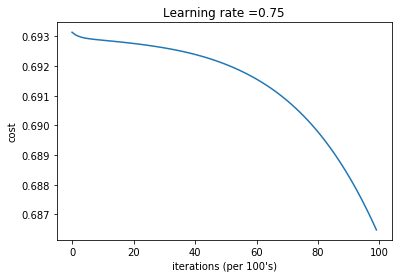

[[0. 0. 1. ... 0. 0. 0.]]
Accuracy: 0.57062656641604
[[0. 0. 0. ... 1. 1. 1.]]
Accuracy: 0.4964920486435921


In [13]:
layers_dims=[784, 100, 1]
parameters, costs = L_layer_model(image_train,label_train, layers_dims, num_iterations = 100, print_cost = True)
pred_train = predict(image_train,label_train, parameters)
pred_test = predict(image_test,label_test, parameters)

Cost after iteration 0: 0.693147
Cost after iteration 10: 0.692951
Cost after iteration 20: 0.692948
Cost after iteration 30: 0.692948
Cost after iteration 40: 0.692948
Cost after iteration 50: 0.692948
Cost after iteration 60: 0.692948
Cost after iteration 70: 0.692948
Cost after iteration 80: 0.692948
Cost after iteration 90: 0.692948


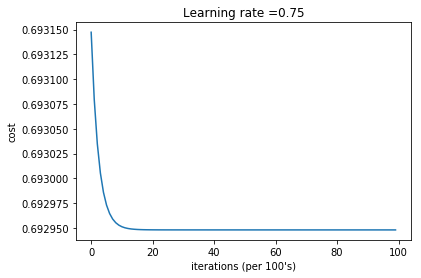

[[0. 0. 0. ... 0. 0. 0.]]
Accuracy: 0.5099749373433584
[[0. 0. 0. ... 0. 0. 0.]]
Accuracy: 0.5159027128157156


In [14]:
layers_dims=[784, 100, 50, 50, 1]
parameters, costs = L_layer_model(image_train,label_train, layers_dims, num_iterations = 100, print_cost = True)
pred_train = predict(image_train,label_train, parameters)
pred_test = predict(image_test,label_test, parameters)